# OCR

Utilizar un perceptrón simple que codifique letras representadas en una grilla
de 5×5 a cadenas de 5 bits de longitud. Se espera que la red asocie cada letra
a una codificación a definir. Se puede restringir el conjunto de letras al rango
A-Z, con mayúsculas únicamente.
Con la red y conjunto de datos definidos realizar entrenamientos con las
siguientes variantes.
1. Funciones de activación escalón y sigmoidea.
2. Distintos variantes en las codificaciones de salida.
3. Agregando ruido a los patrones de entrada.

Luego del entrenamiento con cada variante anterior, testear la red con:

1. Patrones de entrada incompletos.
2. Patrones de entrada con ruido.

Tener en cuenta que el ruido puede consistir en:

1. Cambiar aleatoriamente algunos valores del patrón.
2. Variar todos los valores del patrón con pequeñas magnitudes aleatorias.
3. Una combinación de ambos.

Notar que al agregar ruido del tipo 2 sobre los patrones de letras originarios se
puede construir un conjunto de entrenamiento arbitrariamente grande.



In [1]:
import numpy as np
import itertools
from testing_utils import posibilidadesUmbral, posibilidadesFuncionActivacion, posibilidadesTipoDato, generadoresRuido
from matplotlib import pyplot as mpl
from perceptron_simple import PerceptronSimple

In [2]:
N = 25
M = 5
P = 26

In [3]:
letras = np.loadtxt("letras.txt")
x = letras.reshape((26,25))

In [4]:
z = list( itertools.product( [0,1], repeat=5))
z = np.random.permutation(z)
z = z[:26]

Tipo de Dato Binario
Funcion de Activación Escalón
Sin Umbral
El último error es de 13.8


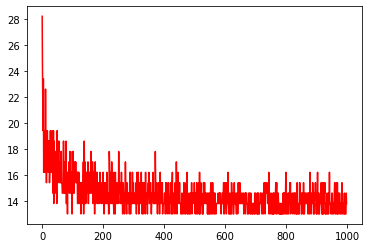

Tipo de Dato Binario
Funcion de Activación Escalón
Con Umbral
El último error es de 13.0


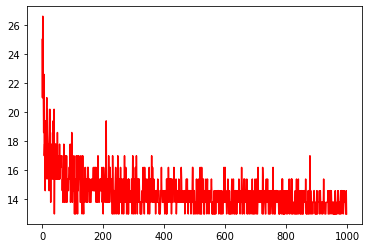

Tipo de Dato Binario
Funcion de Activación Sigmoidea
Sin Umbral
El último error es de 0.15827889313501925


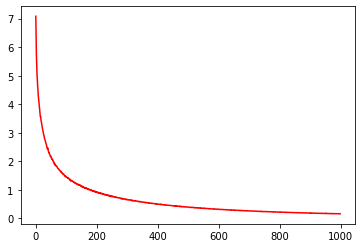

Tipo de Dato Binario
Funcion de Activación Sigmoidea
Con Umbral
El último error es de 0.14506938568721853


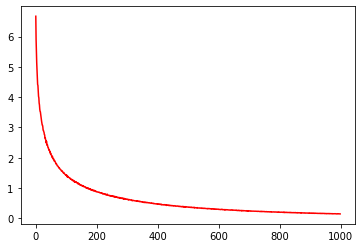

Tipo de Dato Bipolar
Funcion de Activación Escalón
Sin Umbral
El último error es de 0.0


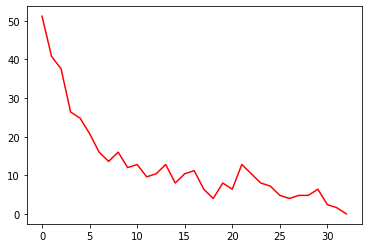

Tipo de Dato Bipolar
Funcion de Activación Escalón
Con Umbral
El último error es de 0.0


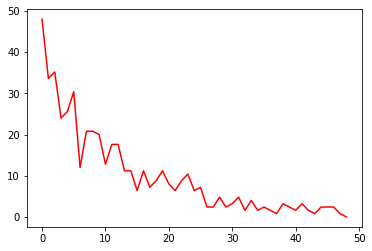

Tipo de Dato Bipolar
Funcion de Activación Sigmoidea
Sin Umbral
El último error es de 0.009926677215759582


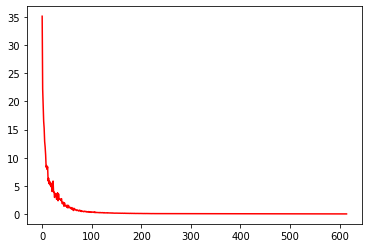

Tipo de Dato Bipolar
Funcion de Activación Sigmoidea
Con Umbral
El último error es de 0.009822712028583104


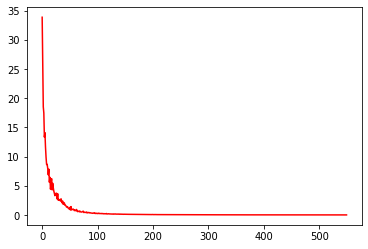

In [5]:
for tipoDato in posibilidadesTipoDato:
    for funcActivacion in posibilidadesFuncionActivacion:
        for umbral in posibilidadesUmbral:
            pc = PerceptronSimple(umbral.getN(N), M, funcActivacion.getG(tipoDato.getTipoDato()), 0.05)
            E = pc.fit(umbral.getX(tipoDato.getX(x)), tipoDato.getZ(z))
            print(
                f'{tipoDato.getName()}\n{funcActivacion.getName()}\n{umbral.getName()}\nEl último error es de {E[-1]}')
            mpl.plot(E, 'r')
            mpl.show()

Ya encontramos cuales son las dos configuraciones con mejor performance, vamos a probar lo del ruido

In [6]:
tipoDato = posibilidadesTipoDato[1]
funcActivacion = posibilidadesFuncionActivacion[0]
z = tipoDato.getZ(z)
g = funcActivacion.getG(tipoDato.getTipoDato())
x = tipoDato.getX(x)
for umbral in posibilidadesUmbral:
    pc = PerceptronSimple(umbral.getN(N), M, g, 0.05)
    x = umbral.getX(x)
    pc.fit(x, z)
    for generadorRuido in generadoresRuido:
        y = np.dot(generadorRuido.transformX(x, tipoDato.getTipoDato()), pc.w)
        d = z-y
        e = np.mean(np.square(d))
        print(
            f'{umbral.getName()}\n{generadorRuido.getName()}\nEl error medio es de {e}\n')


Sin Umbral
Flip Random Values
El error medio es de 5.389698836284464

Sin Umbral
Scale Values
El error medio es de 1.0067642876648037

Con Umbral
Flip Random Values
El error medio es de 4.659431591161864

Con Umbral
Scale Values
El error medio es de 1.0595668631480781

